In [1]:
import numpy as np 
import pandas as pd

import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston 
load_boston = load_boston() 
X = load_boston.data 
y = load_boston.target

C:\Users\Abdullah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [3]:
data = pd.DataFrame(X, columns=load_boston.feature_names) 
data["SalePrice"] = y # saleprice 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
print(load_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
print(data.shape)

(506, 14)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM         506 non-null float64
ZN           506 non-null float64
INDUS        506 non-null float64
CHAS         506 non-null float64
NOX          506 non-null float64
RM           506 non-null float64
AGE          506 non-null float64
DIS          506 non-null float64
RAD          506 non-null float64
TAX          506 non-null float64
PTRATIO      506 non-null float64
B            506 non-null float64
LSTAT        506 non-null float64
SalePrice    506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
data.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
SalePrice    0
dtype: int64

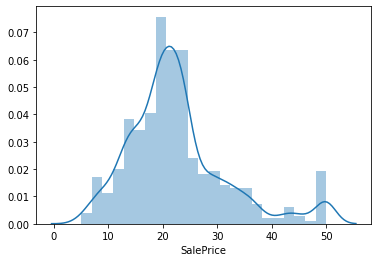

In [9]:
#Target variable
sns.distplot(data['SalePrice']);

In [10]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.108098
Kurtosis: 1.495197


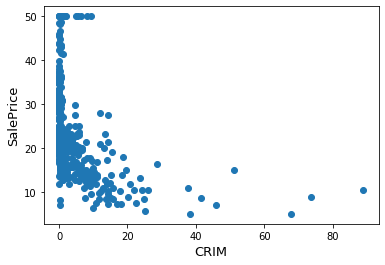

In [11]:
#CRIME vs SalesPrice
fig, ax = plt.subplots()
ax.scatter(x = data['CRIM'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('CRIM', fontsize=13)
plt.show()

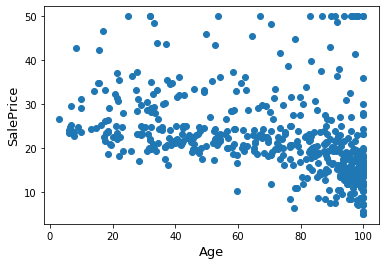

In [12]:
#Age vs SalesPrice
fig, ax = plt.subplots()
ax.scatter(x = data['AGE'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Age', fontsize=13)
plt.show()


 mu = 22.53 and sigma = 9.19



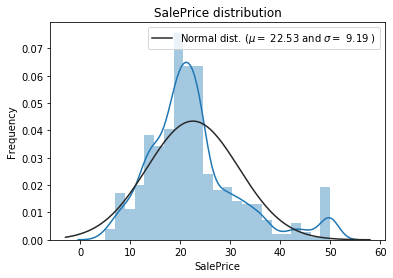

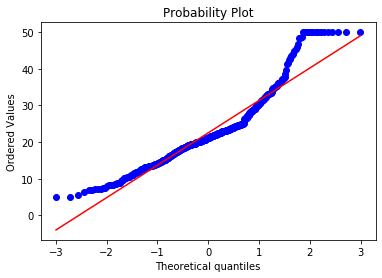

In [13]:
from scipy import stats
#for some statistics
from scipy.stats import norm, skew 

sns.distplot(data['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()


 mu = 3.09 and sigma = 0.39



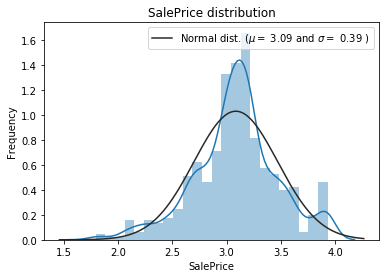

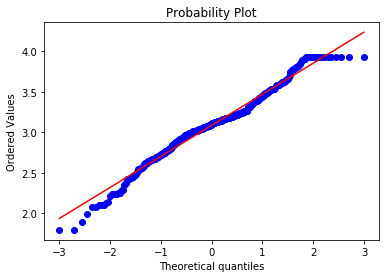

In [14]:
data["SalePrice"] = np.log1p(data["SalePrice"])

sns.distplot(data['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

### Data Corelation

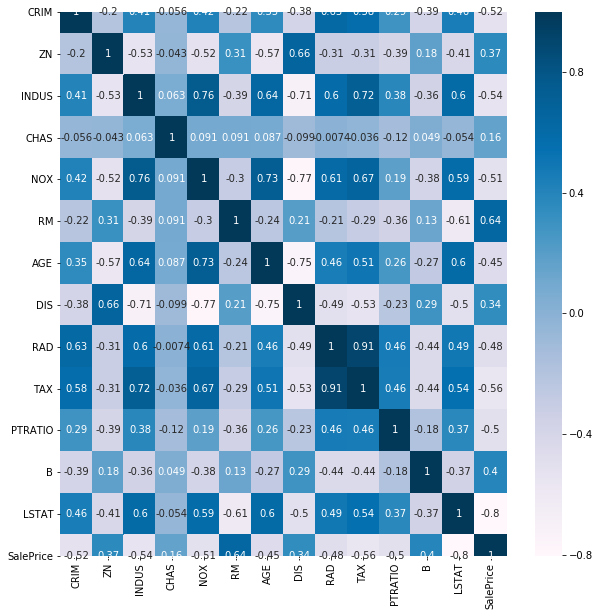

In [15]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [16]:
# absolute value of the correlation 
cor_target = abs(cor["SalePrice"]) 

# highly correlated features 
relevant_features = cor_target[cor_target>0.2] 

# getting the names of the features 
names = [index for index, value in relevant_features.iteritems()] 

# removing target feature 
names.remove('SalePrice') 

# printing the features 
print(names) 
print(len(names))

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
12


### Model building

In [17]:
from sklearn.model_selection import train_test_split 

X = data.drop("SalePrice", axis=1) 
y = data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [21]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression()

In [22]:
predictions = model.predict(X_test)  

print("Actual value of the house:- ", y_test) 

Actual value of the house:-  173    3.202746
274    3.508556
491    2.681022
72     3.169686
452    2.839078
         ...   
412    2.939162
436    2.360854
411    2.901422
86     3.157000
75     3.109061
Name: SalePrice, Length: 102, dtype: float64


In [23]:
print("Model Predicted Value:- ", predictions)

Model Predicted Value:-  [3.36689498 3.63981813 2.77405053 3.28521245 2.89204877 3.14855654
 2.90989604 2.70934849 3.10765839 3.02690015 3.17517887 2.96651727
 1.69187907 3.09867643 3.03443055 3.18049519 3.0420287  2.33503329
 3.75530564 2.82961267 3.33703143 3.41641256 2.64277655 3.16968538
 2.86755109 2.81367827 3.17690968 2.6472422  3.08848134 2.98937208
 3.12449531 3.25161792 3.06333439 2.95814859 2.8088078  2.87134704
 3.46722972 3.07725702 3.1513821  3.24337672 2.76104716 3.47225368
 3.82434052 2.96258466 3.30436996 2.84879457 2.77441924 3.28888779
 2.9788107  3.4214278  3.0927689  3.58805458 2.82572907 3.2473013
 3.74083997 3.10584304 2.89930457 3.51472754 3.23292667 2.76507071
 3.13600605 3.41802256 3.49497936 2.89759764 3.07269958 2.86353031
 2.9303843  3.28590654 3.44229605 2.59727969 3.06655554 3.2776904
 2.52399189 2.93013977 3.18851273 2.21000017 3.07065994 3.78029815
 2.79776777 2.53298389 3.11004712 2.63696135 3.09657491 2.51332818
 3.15538354 3.45897771 2.87989637 3.270

In [24]:
print("Actual value of the house:- ", y_test[0]) 
print("Model Predicted Value:- ", predictions[0])

Actual value of the house:-  3.2188758248682006
Model Predicted Value:-  3.3668949799969585


In [25]:
model.score(X_train, y_train)

0.796504845002159